<a href="https://colab.research.google.com/github/naveenvarma600/BREAST-CANCER-PREDICTION/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [56]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

LOADING DATA SET

In [57]:
x=pd.read_csv("breast_cancer_data.csv")

UNDERSTANDING DATA SET

In [58]:
x.head()
x.describe()
x.corr()
x["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

CONVERTING INTO NUMERIC DATA


In [59]:
#Malignant is represented by 1 and Belign is represented by 0
x1={"M":1,"B":0}
x["diagnosis"]=x["diagnosis"].map(x1)

Assigning predicting(x) and result(y) variables

In [60]:
y=x["diagnosis"]
x.drop(["id","diagnosis","Unnamed: 32"],axis=1,inplace=True)

In [61]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [62]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=42)

GRABBING STAGE NAME(malignant or belign) FROM INTEGER DATA

In [63]:
def get_stage(number):
  if number==0:
    return "Belign"
  else:
    return "Malignant"

LOGISTIC REGRESSION

In [64]:
from sklearn.linear_model import LogisticRegression
reg_log=LogisticRegression()
reg_log.fit(x_train,y_train)

# predciting the testing data
y_pred=reg_log.predict(x_test)

from sklearn.metrics import accuracy_score
reg_log_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it is malignant or belign
my_pred=reg_log.predict(np.asarray((20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678)).reshape(1,-1))
get_stage(my_pred)

'Malignant'

K NEAREST NEIGHGBORS

In [65]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)

# predciting the testing data
y_pred=clf_knn.predict(x_test)

from sklearn.metrics import accuracy_score
clf_knn_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it is malignant or belign
my_pred=clf_knn.predict(np.asarray((20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678)).reshape(1,-1))
get_stage(my_pred)


'Malignant'

NAIVE BAYES

In [66]:
from sklearn.naive_bayes import GaussianNB
clf_gnb=GaussianNB()
clf_gnb.fit(x_train,y_train)

# predciting the testing data
y_pred=clf_gnb.predict(x_test)

from sklearn.metrics import accuracy_score
clf_gnb_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it is malignant or belign.
my_pred=clf_gnb.predict(np.asarray((20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678)).reshape(1,-1))
get_stage(my_pred)

'Malignant'

VISUALIZATION OF MORE ACCURATE ALGORITHM

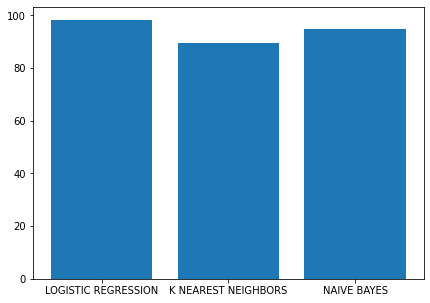

In [67]:
plt.figure(figsize=(7,5))
models=["LOGISTIC REGRESSION","K NEAREST NEIGHBORS","NAIVE BAYES"]
numbers=[reg_log_score,clf_knn_score,clf_gnb_score]
plt.bar(models,numbers)
plt.show()

From the above bar graph,we can clearly say that logistic regression best suits the problem.

H2O AUTOML

In [68]:
!pip install h2o

In [69]:
import h2o
from h2o.automl import H2OAutoML


In [70]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 56 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_6lu84h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [71]:
x=h2o.import_file("breast_cancer_data.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [72]:
x.describe()

Rows:569
Cols:33




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,C33
type,int,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,8670.0,,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.106,0.04996,0.1115,0.3602,0.757,6.802,0.001713,0.002252,0.0,0.0,0.007882,0.0008948,7.93,12.02,50.41,185.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504,NaN
mean,30371831.432337433,,14.127291739894554,19.289648506151142,91.96903339191564,654.8891036906855,0.0963602811950791,0.1043409841827768,0.08879931581722321,0.04891914586994728,0.18116186291739894,0.06279760984182778,0.4051720562390158,1.2168534270650264,2.8660592267135323,40.337079086116,0.007040978910369069,0.025478138840070302,0.03189371634446398,0.011796137082601053,0.020542298769771525,0.0037949038664323374,16.26918980667838,25.67722319859402,107.26121265377857,880.5831282952549,0.13236859402460457,0.2542650439367311,0.27218848330404216,0.11460622319859404,0.2900755711775044,0.0839458172231986,0.0
maxs,911320502.0,,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.304,0.09744,2.873,4.885,21.98,542.2,0.03113,0.1354,0.396,0.05279,0.07895,0.02984,36.04,49.54,251.2,4254.0,0.2226,1.058,1.252,0.291,0.6638,0.2075,NaN
sigma,125020585.61222367,,3.524048826212077,4.301035768166949,24.298981038754906,351.9141291816529,0.014064128137673621,0.052812757932512194,0.07971980870789348,0.038802844859153605,0.02741428133603572,0.007060362795084459,0.2773127329861039,0.5516483926172023,2.0218545540421076,45.4910055161318,0.003002517943839066,0.017908179325677388,0.030186060322988408,0.006170285174046869,0.008266371528798399,0.0026460709670891955,4.833241580469323,6.146257623038319,33.602542269036356,569.3569926699489,0.022832429404835465,0.157336488913742,0.2086242806081323,0.06573234119594205,0.06186746753751869,0.018061267348893986,-0.0
zeros,0,,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,569
0,842302.0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,nan
1,842517.0,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,nan
2,84300903.0,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,nan


In [73]:
training,testing=x.split_frame(ratios=[0.8])

In [74]:
features=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
output="diagnosis"

In [75]:
automl=H2OAutoML(max_models=30,max_runtime_secs=500,seed=1)

In [76]:
automl.train(x=features,y=output,training_frame=training)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [77]:
leaderboard=automl.leaderboard
leaderboard.head

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20210414_062203,0.99745,0.0576975,0.995947,0.0176462,0.124585,0.0155214
StackedEnsemble_AllModels_AutoML_20210414_062203,0.996962,0.1215,0.99516,0.0191016,0.158265,0.0250478
DeepLearning_grid__1_AutoML_20210414_062203_model_2,0.99694,0.0858768,0.995311,0.015957,0.124409,0.0154777
GBM_grid__1_AutoML_20210414_062203_model_4,0.99677,0.0745963,0.994523,0.0227138,0.149519,0.022356
GBM_grid__1_AutoML_20210414_062203_model_5,0.996218,0.078873,0.993616,0.0260921,0.149857,0.022457
GBM_4_AutoML_20210414_062203,0.995857,0.0854944,0.992804,0.031914,0.158918,0.025255
GBM_3_AutoML_20210414_062203,0.995793,0.0853316,0.992689,0.0290031,0.16076,0.0258437
DeepLearning_grid__1_AutoML_20210414_062203_model_1,0.995708,0.125773,0.993324,0.0302248,0.158498,0.0251215
GLM_1_AutoML_20210414_062203,0.995665,0.0748086,0.994464,0.0193354,0.137452,0.018893
GBM_2_AutoML_20210414_062203,0.995644,0.0865033,0.99266,0.0306922,0.159516,0.0254453


<bound method H2OFrame.head of >

In [78]:
preds=automl.predict(testing)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [79]:
print(preds)

predict,B,M
M,0.00119204,0.998808
M,5.74022e-05,0.999943
M,0.000256685,0.999743
M,6.72636e-05,0.999933
M,0.000327173,0.999673
M,7.08011e-05,0.999929
M,0.000297167,0.999703
M,0.00209479,0.997905
B,0.997026,0.00297405
M,0.00798405,0.992016


In [82]:
leader=automl.leader

In [84]:
print(leader.model_performance(xval=True).auc())

0.9974502804691485
